# Exploratory Data Analysis for Vancouver AirBnB Dataset

The purpose of this exploratory data analysis (EDA) is to understand:
- **Preliminary feature selection**: Our dataset contains many features, many of which are categorical variables. Which variables should we select (based on our understanding of AirBnB and collective personal experience) should we select to begin training our model with? 
- **The composition of our dataset**: What are the types of hosts and properties that are represented? This will help us understand the validity of the model we will develop to predict an appropriate nightly price for a new AirBnB property in Vancouver. 
- **Missing data and data preprocessing required**: How much missing data is there? Is it an acceptable amount and how will we treat missing data? What is the range of values in our features? Will we have to preprocess to normalize these values for our model to work well?


## Imports and reading in the data

Note that the data has not been provided in the GitHub repository. The `data.py` script has to be run in order to download the data to your local machine to reproduce this notebook. 

In [1]:
# Imports
import numpy as np
import pandas as pd
import altair as alt
import os

import pandas_profiling
from sklearn.model_selection import train_test_split

In [2]:
#Loading the data set
data = pd.read_csv('../data/listings.csv.gz')

In [3]:
data.head()

id                         listing_url       scrape_id last_scraped  \
0  10080  https://www.airbnb.com/rooms/10080  20191109094845   2019-11-09   
1  13188  https://www.airbnb.com/rooms/13188  20191109094845   2019-11-09   
2  13357  https://www.airbnb.com/rooms/13357  20191109094845   2019-11-09   
3  13490  https://www.airbnb.com/rooms/13490  20191109094845   2019-11-09   
4  14267  https://www.airbnb.com/rooms/14267  20191109094845   2019-11-09   

                                                name  \
0                     D1 -  Million Dollar View 2 BR   
1                  Garden level studio in ideal loc.   
2  ! Wow! 2bed 2bath 1bed den Harbour View Apartm...   
3                       Vancouver's best kept secret   
4                                  EcoLoft Vancouver   

                                             summary  \
0  Stunning two bedroom, two bathroom apartment. ...   
1  Garden level studio suite with garden patio - ...   
2  Very spacious and comfortable with very well k...   
3  This apartment rents for one month blocks of t...   
4  The Ecoloft is located in the lovely, family r...   

                                               space  \
0  Bed setup: 2 x queen, option to add up to 2 tw...   
1  Very Close (3min walk) to Nat Bailey baseball ...   
2  Mountains and harbour view 2 bedroom,2 bath,1 ...   
3  Vancouver city central, 700 sq.ft., main floor...   
4  West Coast Modern Laneway House Loft: We call ...   

                                         description experiences_offered  \
0  Stunning two bedroom, two bathroom apartment. ...                none   
1  Garden level studio suite with garden patio - ...                none   
2  Very spacious and comfortable with very well k...                none   
3  This apartment rents for one month blocks of t...                none   
4  The Ecoloft is located in the lovely, family r...                none   

                               neighborhood_overview  ... instant_bookable  \
0                                                NaN  ...                t   
1  The uber hip Main street area is a short walk ...  ...                t   
2  Amanzing bibrant professional neighbourhood. C...  ...                f   
3  In the heart of Vancouver, this apartment has ...  ...                f   
4  We live in the centre of the city of Vancouver...  ...                t   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f                     moderate   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f  strict_14_with_grace_period   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             t                                t   
3                             f                                f   
4                             f                                f   

   calculated_host_listings_count  \
0                              43   
1                               1   
2                               3   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                           43   
1                                            1   
2                                            1   
3                                            1   
4                                            1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            2   
3                                            0   
4                                            0   

   calculated_hos

## Preliminary feature selection

Let's understand the number of data points and features our dataset has.

In [4]:
print("Our dataset has", data.shape[0],"number of rows and", data.shape[1],"number of columns")

Our dataset has 6181 number of rows and 106 number of columns


As we expected, our dataset has many more features than we would want to start with in our baseline model. Simpler models are better and more interpretable so we want to prune our dataset to only include features that:
1. We would reasonably expect to know when considering setting up a new AirBnB property
2. We believe matters most to nightly price based on our understanding of the AirBnB booking system

We decided on three categories of features: 
1. **Host-related information** such as host response rate to requests, whether the host is a superhost, whether the host identity has been verified
2. **Property-related information** such as property type, the neighborhood, number of people who can be accommodated, number of bathrooms, bedrooms and beds
3. **Booking-related information** such as whether the property can be instantly booked, the cancellation policy



There are also several potential target variables that relate to pricing we can select including monthly, weekly and nightly price. Our chosen target variable is nightly price since we believe that is the one that is most commonly used when booking a property.

We select these features and our target variable from our data below. Then we split our data into X and y training and test sets before doing further EDA. 

In [5]:
# Preprosessing part

#List of chosen features
selected = ['id', 'host_id', 'host_response_rate', 'host_is_superhost', 'property_type', 
             'host_identity_verified', 'neighbourhood_cleansed', 'instant_bookable', 'cancellation_policy', 
            'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price'
           ]

data.drop(data.columns.difference(selected), axis = 1, inplace = True)

#Changing format of price column 
data.price = data.price.str.replace('$', '').str.replace(',', '').astype(float)

#Changing format of host response rate column
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype('float') / 100.0

#Splitting data into test and train 
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'price'), 
                                                    data[['price']], 
                                                    test_size = 0.2,
                                                   random_state = 123)

X_train['price'] = y_train

In [6]:
X_train.head()

id    host_id  host_response_rate host_is_superhost  \
3210  28462644   19201130                 0.8                 f   
1475  16599114   10617862                 1.0                 f   
5753  38856942   41546711                 1.0                 f   
3822  32503415   64045071                 1.0                 f   
4869  36278131  103182440                 1.0                 f   

     host_identity_verified neighbourhood_cleansed property_type  \
3210                      f      Downtown Eastside   Condominium   
1475                      t     Grandview-Woodland         House   
5753                      t        West Point Grey         House   
3822                      t               Downtown   Condominium   
4869                      f               Downtown     Apartment   

      accommodates  bathrooms  bedrooms  beds instant_bookable  \
3210             4        2.0       2.0   2.0                f   
1475             2        2.5       1.0   1.0                f   
5753             1        1.0       1.0   0.0                t   
3822             5        1.0       2.0   2.0                f   
4869             4        1.0       1.0   1.0                t   

              cancellation_policy  price  
3210                     moderate  199.0  
1475                     moderate   81.0  
5753  strict_14_with_grace_period   36.0  
3822  strict_14_with_grace_period   40.0  
4869  strict_14_with_grace_period  399.0

## Composition of our dataset

### Understanding our features

To begin our EDA, we want to use Pandas Profiling Report. This report does not render on GitHub.com. A copy of the report can be found in the analysis folder as 'profile.html'. We want to understand the composition of the type of hosts, properties and bookings in our dataset. 

In [7]:
profile = pandas_profiling.ProfileReport(X_train)
profile

In [8]:
profile.to_file(output_file="profile.html")

Here are some select insights: 

**Hosts:**
- About 1/3 of hosts' identities are verified and 1/3 of hosts' are superhosts. This is a pretty good spread and the composition of the hosts in our dataset is not extremely unbalanced. 
- Vast majority of hosts have high response rates. As we fit models to our dataset, this may be a less important metric since there is not much differentiation etween hosts. This parameter has a high number of missing values (12.5% of the dataset). We can either choose to not include this variable or understand what missing data means (e.g., does it mean that it's a new host who has never responded to a request) and treat the data appropriately.
- A handful of hosts have missing identity and superhost. Since there aren't too many, we can probably remove data points with missing host data from our dataset.
- There are around ~3500 hosts for ~5000 properties. This means that some hosts have multiple properties. This does not impact our analysis since we're interested in how to price a future AirBnB property. 

**Properties:** 
- The histograms of how many people each property can accommodate, the number of bathrooms, bedrooms and beds suggest that there is a variety of properties in our dataset. For example, the most common number of people that properties can accommodate is 2 but there is a healthy range from 1 to 8.
- Property type is also sufficiently varied with the majority being houses, apartments and condos. There are 15 additional categories to this. It may be worth it to combine certain categories so that we reduce the number of features as a part of preprocessing. 
- There are 23 neighborhoods with the majority of properties located downtown. While intuitively, neighborhood is a probably a good predictor for price, this may be too many categories. We should consider merging nearby neighborhoods to reduce the number of categories.

**Bookings:**
- The most common cancellation policy is "strict_14_with_grace_period" and there is sufficient distribution in "moderate" and "flexible" for our dataset to learn from. There are only 2 datapoints with a "strict" cancellation policy - our model may not predict well with this policy since there are so few datapoints to learn from. 
- There is almost an equal split between whether a property is instantly bookable or not.


In general, there are no glaring issues with using our dataset for machine learning. There is some preprocessing to be done with missing data and feature selection / engineering to simplify the model. 

### Understanding our target variable

We also want to understand the distribution of prices (our target variable) in our training set. We plot a histogram below.

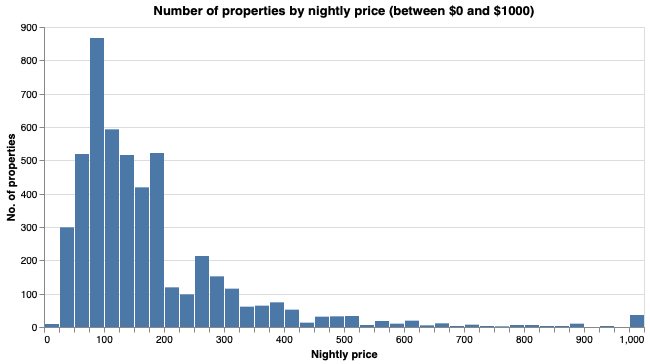

In [12]:
alt.Chart(X_train).mark_bar(clip = True).encode(
    alt.X('price:Q',
         scale=alt.Scale(domain=(0, 1000)),
         bin=alt.Bin(extent=[0, 1000], step=25),
         title='Nightly price'),
    alt.Y('count()', title='No. of properties')
).properties(width=600, height = 300, title = 'Number of properties by nightly price (between $0 and $1000)')

Majority of properties are priced between $50 to $200 per night. There is a long right tail to this distribution indicating that there are few properties at high nightly prices. As we create a model that suggests / predicts a price of a new AirBnB property, we have to be conscious of the fact that the training set has had more data to learn from at prices towards the centre of the distribution. 

## Further analysis on neighborhoods and property type

We want to understand how nightly price varies with neighborhoods and property type. To do this, we have labeled our nightly pricing as low (<100 CAD), mid (100-300 CAD), high (300-500 CAD) and exceptional (above 500 CAD). We create a dataframe below to assist with our analysis. 

In [12]:
price_data_labels = X_train[['price', 'neighbourhood_cleansed', 'property_type']]
price_data_labels['label'] = pd.cut(price_data_labels['price'], bins=[0, 100, 300, 500, 13000], 
                               include_lowest=True, labels=['low', 'mid', 'high', 'exceptional'])
price_data_labels

price neighbourhood_cleansed property_type label
3210  199.0      Downtown Eastside   Condominium   mid
1475   81.0     Grandview-Woodland         House   low
5753   36.0        West Point Grey         House   low
3822   40.0               Downtown   Condominium   low
4869  399.0               Downtown     Apartment  high
...     ...                    ...           ...   ...
5218  298.0               West End     Apartment   mid
4060   65.0      Downtown Eastside         House   low
1346   59.0       Hastings-Sunrise   Guest suite   low
3454  223.0               West End   Condominium   mid
3582  110.0         Mount Pleasant   Condominium   mid

[4944 rows x 4 columns]

### Understanding price by neighborhood

To understand the relationship between nightly price and neighborhoods, we analyze the distribution of the number of properties by neighborhood and price point. 

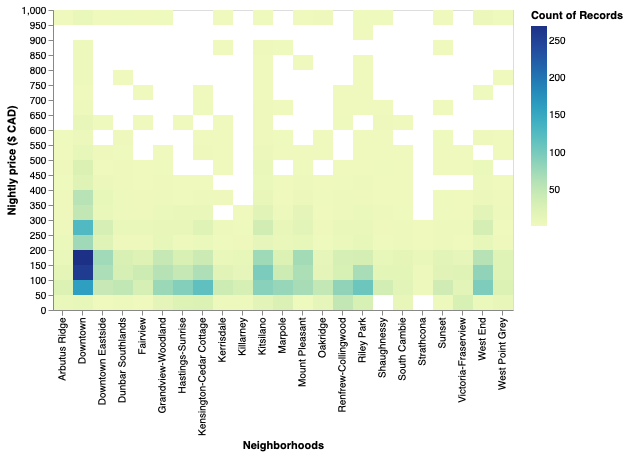

In [13]:
alt.Chart(price_data_labels).mark_rect().encode(
    alt.X('neighbourhood_cleansed:N', title="Neighborhoods"),
    alt.Y('price:Q', bin=alt.Bin(extent=[0, 1000], step=50), title="Nightly price ($ CAD)"),
    alt.Color('count()')
)

**Select insights:**
- Some neighborhoods do not have any properties listed above a certain price point. For instance, Strathcona and Killarney have no properties listed above 350/night. Most neighborhoods do not have any properties listed above 600/night. This lack of training examples for properties of certain prices in certain neighborhoods has implications on our model's ability to predict properties in these "edge cases". 
- Downtown and Kitsilano have some of the highest priced properties, with listings almost consistently up to 1000/night.
- This analysis further emphasizes the need to combine neighborhoods to improve the performance of our model.

Below is a tool that shows the distribution of price categories by neighborhood. You can toggle by neighborhood (does not render correctly on GitHub.com). 

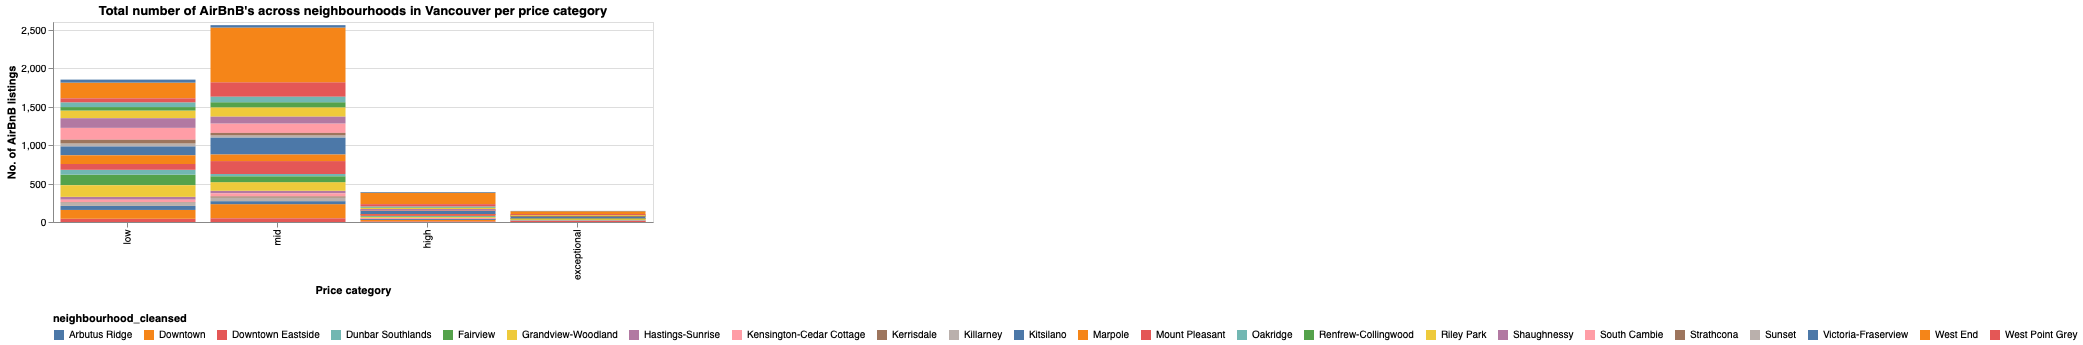

In [14]:
# Choose the neighborhood in the drop down to see the distribution of nightly prices. 

select_box = alt.binding_select(options=list(price_data_labels['neighbourhood_cleansed'].unique()))
selection = alt.selection_single(name='Select', fields=['neighbourhood_cleansed'], bind=select_box)

b_line = alt.Chart(price_data_labels).mark_bar().encode(
    alt.X('label:N', title = 'Price category',
          sort=["low", "mid", "high", "exceptional"]),
    alt.Y('count()', title = 'No. of AirBnB listings'),
    color = 'neighbourhood_cleansed').properties(width=600, height = 200)

b_line.add_selection(
    selection
).transform_filter(
    selection
).configure_legend(
    orient='bottom'
).properties(
    title = "Total number of AirBnB's across neighbourhoods in Vancouver per price category"
)


Below is a tool that displays the number of properties in each neighborhood by a selected price category. This is meant to be interactive. 

In [15]:
# Table for total count of Airbnb listings per price category in a neighbourhood. Can be used for exploratory purposes. 
by_neighboorhood = price_data_labels.groupby(['label', 'neighbourhood_cleansed']).count().reset_index()
by_neighboorhood = by_neighboorhood.drop(['property_type'], axis = 1).rename(columns={"price": "count"})

# Selection
by_neighboorhood.loc[by_neighboorhood['label'] == 'low']

label    neighbourhood_cleansed  count
0    low             Arbutus Ridge   39.0
1    low                  Downtown  204.0
2    low         Downtown Eastside   52.0
3    low         Dunbar Southlands   62.0
4    low                  Fairview   45.0
5    low        Grandview-Woodland  100.0
6    low          Hastings-Sunrise  125.0
7    low  Kensington-Cedar Cottage  155.0
8    low                Kerrisdale   48.0
9    low                 Killarney   37.0
10   low                 Kitsilano  117.0
11   low                   Marpole  113.0
12   low            Mount Pleasant   75.0
13   low                  Oakridge   63.0
14   low       Renfrew-Collingwood  138.0
15   low                Riley Park  151.0
16   low               Shaughnessy   37.0
17   low              South Cambie   30.0
18   low                Strathcona    5.0
19   low                    Sunset   46.0
20   low       Victoria-Fraserview   52.0
21   low                  West End  115.0
22   low           West Point Grey   42.0

### Understanding price by property type

To understand the relationship between nightly price and property type, we analyze the distribution of the number of properties by property type and price point. 

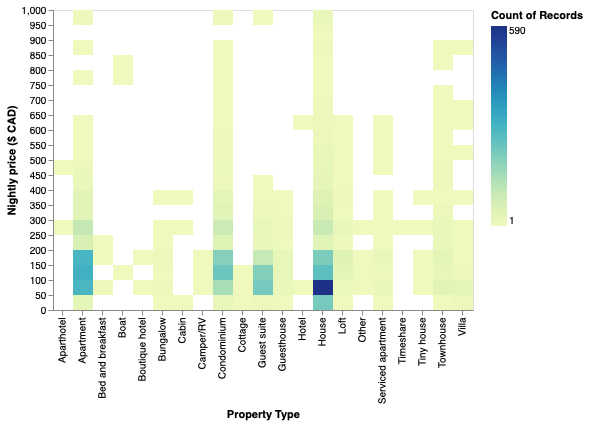

In [16]:
alt.Chart(price_data_labels).mark_rect().encode(
    alt.X('property_type:N', title="Property Type"),
    alt.Y('price:Q', bin=alt.Bin(extent=[0, 1000], step=50), title="Nightly price ($ CAD)"),
    alt.Color('count()')
)

**Select insights:**
- Other than houses, condos and apartments, other categories have very sparse data, especially across price points. In particular, Aparthotel, Bed and breakfast, Boat, Boutique hotel, Cabin, Cottage, Hotel, Timeshare and Tinyhouse are problematic. These categories should probably be collapsed into "Other" as a part of preprocessing. 
- The model would be able to best predict on unseen house, apartment and condo properties since there is the most data to learn from across price points.

Below is a tool that shows the distribution of price categories by property type. You can toggle by property (does not render correctly on GitHub.com). 

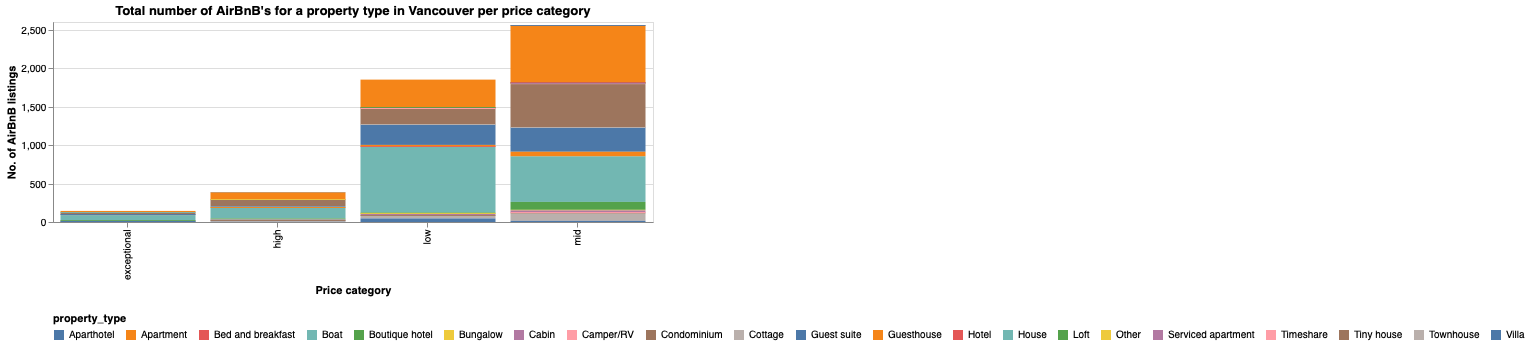

In [17]:
# Choose the property type in the drop down to see the distribution of nightly prices. 

select_box_2 = alt.binding_select(options=list(price_data_labels['property_type'].unique()))
selection_2 = alt.selection_single(name='Select', fields=['property_type'], bind=select_box_2)

b_line_2 = alt.Chart(price_data_labels).mark_bar().encode(
    alt.X('label:N', title = 'Price category'),
    alt.Y('count()', title = 'No. of AirBnB listings'),
    color = 'property_type').properties(width=600, height = 200)

b_line_2.add_selection(
    selection_2
).transform_filter(
    selection_2
).configure_legend(
    orient='bottom'
).properties(
    title = "Total number of AirBnB's for a property type in Vancouver per price category"
)

### Draft of machine learning script

In [113]:
### DO NOT INCLUDE IN SCRIPT
# Preprocessing part
data = pd.read_csv('../data/listings.csv.gz')

#List of chosen features
selected = ['id', 'host_id', 'host_response_rate', 'host_is_superhost', 'property_type', 
             'host_identity_verified', 'neighbourhood_cleansed', 'instant_bookable', 'cancellation_policy', 
            'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price'
           ]

data.drop(data.columns.difference(selected), axis = 1, inplace = True)

#Changing format of price column 
data.price = data.price.str.replace('$', '').str.replace(',', '').astype(float)

#Changing format of host response rate column
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype('float') / 100.0

# ........

In [208]:
### IN SCRIPT 
import numpy as np
import pandas as pd
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [149]:
### IN SCRIPT (assume reading in a cleaned data file)

data = pd.read_csv('../data/data_cleaned.csv')

# Splitting data into test and train 
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ['price', 'id', 'host_id']), 
                                                    data[['price']], 
                                                    test_size = 0.2,
                                                   random_state = 123)


In [224]:
### IN SCRIPT (assume reading in train and test csv separately)
train = pd.read_csv('../data/train_data.csv')
test = pd.read_csv('../data/test_data.csv')

X_train = train.drop(columns = ['price', 'id', 'host_id'])
y_train = train[['price']]

X_test = test.drop(columns = ['price', 'id', 'host_id'])
y_test = test[['price']]

In [236]:
# Identify numeric and categorical features
numeric_features = ['host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds']

categorical_features = ['host_is_superhost','property_type','host_identity_verified', 
                        'neighbourhood_cleansed','instant_bookable','cancellation_policy']

# Build a pipeline to do data processing
numeric_transformer = Pipeline(steps=[
                                      ('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())
                                    ])


categorical_transformer = Pipeline(steps=[
                                          ('imputer', SimpleImputer(strategy='constant', 
                                                                    fill_value='missing')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                         ])

preprocessor = ColumnTransformer(
                                 transformers=[
                                    ('num', numeric_transformer, numeric_features),
                                    ('cat', categorical_transformer, categorical_features)
                                ])

X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

In [206]:
### Baseline performance using MSE
X_train_subset, X_valid, y_train_subset, y_valid = train_test_split(X_train_p, 
                                                    y_train, 
                                                    test_size = 0.2,
                                                   random_state = 123)
results_dict = {}

models = {
          'lr': LinearRegression(),
          'kNN': KNeighborsRegressor(),
          'svr' : SVR(kernel='rbf'), 
          'rfr' : RandomForestRegressor(), 
         }

for model_name, model in models.items():
    t = time.time()  
    model.fit(X_train_subset, y_train_subset);
    y_train_pred = model.predict(X_train_subset)
    y_valid_pred = model.predict(X_valid)
    tr_mse = mean_squared_error(y_train_subset, y_train_pred)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)
    elapsed_time = time.time() - t
    results_dict[model_name] = [round(tr_mse,3), round(valid_mse,3), round(elapsed_time,4)]
    
results_df = pd.DataFrame(results_dict).T
results_df.columns = ["Train MSE", "Validation MSE", "Time in seconds"]
results_df

Train MSE  Validation MSE  Time in seconds
lr   69770.758       73207.926           0.0550
kNN  56795.108       99535.033           0.7118
svr  77902.276       79010.283           1.4731
rfr  19138.821      102375.920           6.5563

In [246]:
results_df.to_csv('../report/baseline_results.csv')

In [204]:
svr = SVR(kernel='rbf')
param_grid = {
    "gamma" : np.geomspace(10e-6, 1, 6)
}

random_search_svr = RandomizedSearchCV(svr, param_grid, cv=10, scoring = make_scorer(mean_squared_error))
random_search_svr.fit(X_train_p, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False,
                   scoring=make_scorer(mean_squared_error), verbose=0)

In [205]:
print("The best hyperparameter is:", random_search_svr.best_params_)
print("The corresponding MSE of the best hyperparameter value is", random_search_svr.best_score_)

The best hyperparameter is: {'gamma': 1e-05}
The corresponding MSE of the best hyperparameter value is 84848.33629758673


In [212]:
knn = KNeighborsRegressor()
param_grid = {
    "n_neighbors" : np.arange(4, 32, 4),
    "weights"     : ['uniform', 'distance']
}

random_search_knn = RandomizedSearchCV(knn, param_grid, cv=10, scoring = make_scorer(mean_squared_error))
random_search_knn.fit(X_train_p, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': array([ 4,  8, 12, 16, 20, 24, 28]),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False,
                   scoring=make_scorer(mean_squared_error), verbose=0)

In [213]:
print("The best hyperparameter is:", random_search_knn.best_params_)
print("The corresponding MSE of the best hyperparameter value is", random_search_knn.best_score_)

The best hyperparameter is: {'weights': 'distance', 'n_neighbors': 4}
The corresponding MSE of the best hyperparameter value is 86701.15105340516


In [211]:
lr = LinearRegression()
pf = PolynomialFeatures() 

pipe = Pipeline(steps=[('pf', PolynomialFeatures()), ('lm', LinearRegression())])

param_grid = {
    'pf__degree': np.arange(0,10,1),
}

random_search_lr = RandomizedSearchCV(pipe, param_grid, cv=10)
random_search_lr.fit(X_train_p, y_train)

KeyboardInterrupt: 

In [ ]:
print("The best hyperparameter is:", random_search_lr.best_params_)
print("The corresponding MSE of the best hyperparameter value is", random_search_lr.best_score_)

In [217]:
svr_gamma = random_search_svr.best_params_['gamma']
knn_weights = random_search_knn.best_params_['weights']
knn_neighbors = random_search_knn.best_params_['n_neighbors']

In [221]:
best_models_dict = {}

models = {
          'lr': LinearRegression(),
          'kNN_optimized': KNeighborsRegressor(n_neighbors=knn_neighbors, weights=knn_weights),
          'svr_optimized' : SVR(kernel='rbf', gamma=svr_gamma), 
         }

for model_name, model in models.items():
    t = time.time()  
    model.fit(X_train_subset, y_train_subset);
    y_train_pred = model.predict(X_train_subset)
    y_valid_pred = model.predict(X_valid)
    tr_mse = mean_squared_error(y_train_subset, y_train_pred)
    valid_mse = mean_squared_error(y_valid, y_valid_pred)
    elapsed_time = time.time() - t
    best_models_dict[model_name] = [round(tr_mse,3), round(valid_mse,3), round(elapsed_time,4)]
    
best_models_df = pd.DataFrame(best_models_dict).T
best_models_df.columns = ["Train MSE", "Validation MSE", "Time in seconds"]
best_models_df

Train MSE  Validation MSE  Time in seconds
lr             69770.758       73207.926           0.0354
kNN_optimized   4895.638       93072.143           0.6067
svr_optimized  84757.310       85335.835           1.3171

In [247]:
best_models_df.to_csv('../report/optimized_results.csv')

In [203]:
### Hyperparameter optimization for rfr
#randomizedSearchCV

rfr = RandomForestRegressor()
param_grid = {
    "max_depth": np.arange(10, 30, 2)
}

random_search_rfr = RandomizedSearchCV(rfr, param_grid, cv=10, scoring = make_scorer(mean_squared_error))
random_search_rfr.fit(X_train_p, y_train)

KeyboardInterrupt: 

In [ ]:
print("The best hyperparameter is:", random_search_rfr.best_params_)
print("The corresponding MSE of the best hyperparameter value is", random_search_rfr.best_score_)

In [237]:
# fit model to linear regression
lr = LinearRegression()
lr.fit(X_train_p, y_train)
y_train_pred = lr.predict(X_train_p)
y_test_pred = lr.predict(X_test_p)

In [152]:
# fit model using best model and best hyperparameter and display results
rfr = RandomForestRegressor(min_samples_split = 4)
rfr.fit(X_train_p, y_train)
y_train_pred = rfr.predict(X_train_p)
y_test_pred = rfr.predict(X_test_p)

In [238]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()
test_residuals = y_test_pred - y_test
compare_test_predictions_df = pd.DataFrame({'true': y_test, 'predicted': y_test_pred, 'residuals': test_residuals})
compare_test_predictions_df

true   predicted  residuals
0      110  134.270603  24.270603
1       30    2.794184 -27.205816
2       75   83.678059   8.678059
3      129  218.205375  89.205375
4       32   68.765179  36.765179
...    ...         ...        ...
4322   349  274.591828 -74.408172
4323   118  136.148290  18.148290
4324   125  202.348608  77.348608
4325   125  154.426511  29.426511
4326   110  200.500701  90.500701

[4327 rows x 3 columns]

In [248]:
residual_plot = alt.Chart(compare_test_predictions_df).mark_circle(size=4).encode(
    alt.X('true',
          scale=alt.Scale(domain=(0, 800)),
          title='true price'),
    alt.Y('residuals',
          scale=alt.Scale(domain=(-800, 800)),
         title='residuals: predicted less actual')
).properties(title='Residual plot for linear regression'
).interactive()

In [251]:
residual_plot.save('../report/residual_plot.png')

In [191]:
rfr.feature_importances_

array([3.86229572e-02, 1.71140243e-01, 4.46219184e-01, 3.51830006e-02,
       4.65811019e-02, 7.08815289e-03, 1.59838662e-04, 5.46196442e-03,
       6.21828517e-04, 5.12790453e-02, 1.75291700e-04, 1.98814987e-03,
       2.66577446e-06, 1.52668909e-04, 1.64020773e-04, 4.19614260e-06,
       1.77016551e-02, 5.89423743e-06, 1.94637506e-03, 8.05160456e-04,
       1.50523186e-03, 1.36735102e-02, 1.55635923e-03, 2.18653224e-05,
       2.96275752e-03, 8.62564504e-05, 5.92152759e-05, 1.99252871e-03,
       5.38846113e-04, 1.06836946e-02, 3.27254724e-05, 1.12735647e-02,
       1.88353861e-03, 2.67036259e-02, 3.53604261e-03, 2.50641705e-03,
       1.25323057e-03, 1.73759905e-02, 1.24161552e-03, 1.47418826e-03,
       3.50626937e-03, 4.99282180e-04, 5.75918788e-03, 1.40906355e-03,
       2.26795499e-03, 5.71107860e-04, 1.20813732e-03, 6.54810222e-03,
       1.89155365e-03, 6.05342446e-04, 1.18703175e-04, 5.97849635e-04,
       1.77125035e-03, 1.29573850e-02, 1.59113191e-03, 7.58663845e-03,
      

# .... Unused code ....

In [95]:
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

lr = LinearRegression()
t = time.time()
lr.fit(X_train_p, y_train)
tr_score = lr.score(X_train_p, y_train)
test_score = lr.score(X_test_p, y_test)
elapsed_time = time.time() - t

print(tr_score, test_score, elapsed_time)

0.22777248312452478 0.05240666322442411 0.040342092514038086


In [96]:
knn = KNeighborsRegressor()
t = time.time()
knn.fit(X_train_p, y_train)
tr_score = knn.score(X_train_p, y_train)
test_score = knn.score(X_test_p, y_test)
elapsed_time = time.time() - t

print(tr_score, test_score, elapsed_time)

0.42382944561699715 0.060491015116635016 1.316343069076538


In [97]:
svr = SVR(kernel='rbf')
t = time.time()
svr.fit(X_train_p, y_train)
tr_score = svr.score(X_train_p, y_train)
test_score = svr.score(X_test_p, y_test)
elapsed_time = time.time() - t

print(tr_score, test_score, elapsed_time)

0.07001140586452692 0.034313394404131836 2.769575834274292


In [98]:
rfr = RandomForestRegressor()
t = time.time()
rfr.fit(X_train_p, y_train)
tr_score = rfr.score(X_train_p, y_train)
test_score = rfr.score(X_test_p, y_test)
elapsed_time = time.time() - t

print(tr_score, test_score, elapsed_time)

0.8309152939904321 0.008386911628541105 9.699465990066528


In [117]:
### Baseline performance using r^2
results_dict = {}

models = {
          'lr': LinearRegression(),
          'kNN': KNeighborsRegressor(),
          'svr' : SVR(kernel='rbf'), 
          'rfr' : RandomForestRegressor(), 
         }

for model_name, model in models.items():
    t = time.time()  
    model.fit(X_train_p, y_train);
    tr_score = model.score(X_train_p, y_train)
    valid_score = model.score(X_test_p, y_test)
    elapsed_time = time.time() - t
    results_dict[model_name] = [round(tr_score,3), round(valid_score,3), round(elapsed_time,4)]
    
results_df = pd.DataFrame(results_dict).T
results_df.columns = ["Train score", "Validation score", "Time in seconds"]
results_df

Train score  Validation score  Time in seconds
lr         0.228             0.052           0.0512
kNN        0.424             0.060           1.3018
svr        0.070             0.034           2.8517
rfr        0.830             0.026           9.8637

In [142]:
### Hyperparameter optimization for rfr
#randomizedSearchCV

rfr = RandomForestRegressor()
param_grid = {
    "min_samples_split": np.arange(2, 100, 2)
}

random_search = RandomizedSearchCV(rfr, param_grid, cv=10)
random_search.fit(X_train_p, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [143]:
print("The best hyperparameter is:", random_search.best_params_)
print("The corresponding score of the best hyperparameter value is", random_search.best_score_)

The best hyperparameter is: {'min_samples_split': 80}
The corresponding score of the best hyperparameter value is 0.3249985396074101


In [263]:


# process and drop columns that can't be encoded
processor = LabelEncoder()
X_train = X_train.drop(columns = "host_is_superhost")
X_train[['property_type']] = processor.fit_transform(X_train[['property_type']])
X_train = X_train.drop(columns = "host_identity_verified")
X_train[['neighbourhood_cleansed']] = processor.fit_transform(X_train[['neighbourhood_cleansed']])
X_train = X_train.drop(columns = "instant_bookable")
X_train[['cancellation_policy']] = processor.fit_transform(X_train[['cancellation_policy']])

X_train = X_train.drop(columns = ["id", "host_id", "price"])

# remove column headers
X_train.columns = [''] * len(X_train.columns)
y_train.columns = [''] * len(y_train.columns)

# change format to array
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [264]:
# preprocessing for testing data

# process and drop columns that can't be encoded
processor = LabelEncoder()
X_test = X_test.drop(columns = "host_is_superhost")
X_test[['property_type']] = processor.fit_transform(X_test[['property_type']])
X_test = X_test.drop(columns = "host_identity_verified")
X_test[['neighbourhood_cleansed']] = processor.fit_transform(X_test[['neighbourhood_cleansed']])
X_test = X_test.drop(columns = "instant_bookable")
X_test[['cancellation_policy']] = processor.fit_transform(X_test[['cancellation_policy']])

X_test = X_test.drop(columns = ["id", "host_id"])

# remove column headers
X_test.columns = [''] * len(X_test.columns)
y_test.columns = [''] * len(y_test.columns)

# change format to array
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [265]:
def fit_and_report(model, X, y, Xv, yv, mode = 'regression'):
    """
    fits and trains a model on the dataset and reports the train and validation error to use as a baseline for the case without pruning features,
    if the mode is regression then it returns the training and validation mean squared error,
    if the mode is classification then it returns the training and validation error
    """
    model.fit(X, y)
    if mode.lower().startswith('regress'):
        errors = [mean_squared_error(y, model.predict(X)), mean_squared_error(yv, model.predict(Xv))]
    if mode.lower().startswith('classif'):
        errors = [1 - model.score(X,y), 1 - model.score(Xv,yv)]        
    return errors

In [ ]:
# number of features to select RFE 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVC, SVR

train_MSE = []
test_MSE = []

for i in range(1,20):
    lr = LinearRegression()
    rfe = RFE(estimator = lr, n_features_to_select = i)
    rfe.fit(X_train, y_train)
    
    X_train_sel = X_train[:, rfe.support_]
    X_test_sel = X_test[:, rfe.support_]

    clf = SVR(kernel = 'rbf')
    errors = fit_and_report(clf, X_train_sel, y_train, X_test_sel, y_test, mode = "classification")
    
    train_MSE.append(errors[0])
    test_MSE.append(errors[1])

In [ ]:
import matplotlib.pyplot as plt

num_of_feat = np.arange(1, 20, 1)
train_MSE

plt.plot(num_of_feat, train_MSE)
plt.xlabel('number of features')
plt.ylabel('training MSE')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

num_of_feat = np.arange(1, 20, 1)
test_MSE

plt.plot(num_of_feat, test_MSE)
plt.xlabel('number of features')
plt.ylabel('validation MSE')
plt.show()

In [ ]:
class ForwardSelection:
    def __init__(self, model, 
                 min_features=None, 
                 max_features=None, 
                 scoring=None, 
                 cv=None):
        """
        initializes the ForwardSelection model
        
        parameters:
        - max_features: sets the maximum number of features to be selected
        - min_features: sets the minimum number of features to be selected
        - model: the model used to generate the cross validation score to obtain the error for a given set of features
        - cv: the number of times we split the data, fit a model, and compute the score
        - scoring: method of scoring
        """
        self.max_features = max_features
        if min_features is None:
            self.min_features = 1
        else:
            self.min_features = min_features
    
        self.model = model
        self.scoring = scoring
        self.cv = cv
        self.ftr_ = []
        return
    
    def fit(self, X, y):
        """
        fits the ForwardSelection model
        
        parameters:
        - X: features and their values
        - y: targets and their values
        
        returns: a list of indexes of the features to be selected        
        """
        best_error = np.Inf
        
        if X.shape[1] >= 1 and X.shape[0] >= X.shape[1]:
            while True:
            
                # get errors from new_candidates and create a list of errors with mean of cross_val_score 
                errors = []
                new_candidates = list(set(range(X.shape[1])) - set(self.ftr_))
                
                # for each index in new_candidates, add each index with the existing indexes and get error for each
                for i in new_candidates:
                    X_new = X[:,self.ftr_ + [i]]
                    error = 1 - np.mean(cross_val_score(self.model, X_new, y, cv= self.cv))
                    errors.append(error)
            
                # check 2 termination coniditions: (1) if error is too large, (2) if we exceed max features
                # if we can't terminate or we have under the min features, set new best_error and add index of min_error to self.ftr_
                if np.min(errors) >=  best_error:
                    if len(self.ftr_) < self.min_features:
                        best_error = np.min(errors)
                        self.ftr_.append(new_candidates[np.argmin(errors)])
                        print("need more features")
                    else:
                        break
                
                elif len(self.ftr_) >= self.max_features:
                        break    
                else:
                    best_error = np.min(errors)
                    self.ftr_.append(new_candidates[np.argmin(errors)])
                    print("can't terminate, adding another feature")
                    
                    
    def transform(self, X, y=None):
        """
        transforms a given X split to select a subset of features
        
        parameters:
        - X: features and their values
        - y: is equal to None because we are selecting features, not targets
        """
        return X[:, self.ftr_]

In [ ]:
# forward selection implementation

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

fs_1 = ForwardSelection(LinearRegression(), min_features = 1, max_features = 10, cv = 10)
fs_1.fit(X_train, y_train)
X_train_sel = fs_1.transform(X_train)
X_test_sel = fs_1.transform(X_test)

clf = SVR(kernel = 'rbf')
errors = fit_and_report(clf, X_train_sel, y_train, X_test_sel, y_test, mode = "classification")

print('Train error %0.3f'%(errors[0]))
print('Test error %0.3f'%(errors[1]))